In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
from copy import deepcopy
import sys
sys.path.append('../src')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# plt.style.use('dark_background')
from tqdm import tqdm
import mat4py
import data
import pickle as pkl
from viz import *
import viz
import trend_filtering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = data.get_data(use_processed=True) # all_data=True
df = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots
outcome = 'y_consec_thresh'

# load dynamin tracks

In [3]:
df = pd.read_pickle('../data/tracks/tracks_clath_aux_dynamin.pkl')

In [4]:
df = df[df.catIdx.isin([1, 2])]
df = df[df.lifetime > 15]

In [5]:
df.shape

(43926, 24)

In [6]:
df.keys()

Index(['lifetime', 'cell_num', 'catIdx', 't', 'mean_total_displacement',
       'mean_square_displacement', 'x_pos_seq', 'y_pos_seq', 'x_pos', 'y_pos',
       'X_pvals', 'X_extended', 'X', 'X_starts', 'X_ends', 'Y_pvals', 'Y',
       'Y_starts', 'Y_ends', 'Z_pvals', 'Z', 'Z_starts', 'Z_ends',
       'lifetime_extended'],
      dtype='object')

In [16]:
df['Y_max'] = [max(y) for y in df['Y']]
df['Z_max'] = [max(z) for z in df['Z']]
df['Y-Z'] = df['Y_max'] - df['Z_max']


df['Y_max_sig'] = np.nan
df['Z_max_sig'] = np.nan
for i in tqdm(range(df.shape[0])):
    r = df.iloc[i]
    try:
        df['Y_max_sig'].iloc[i] = max(np.array(r['Y'])[np.array(r['Y_pvals']) < 0.05])
    except:
        pass
    try:
        df['Z_max_sig'].iloc[i] = max(np.array(r['Z'])[np.array(r['Z_pvals']) < 0.05])
    except:
        pass
    
#     df['Z_max_sig'] = [max(z) for z in df['Z']]
df['Y-Z_sig'] = df['Y_max_sig'] - df['Z_max_sig']

  1%|          | 520/43926 [00:00<00:25, 1724.52it/s]/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/accounts/projects/vision/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
100%|██████████| 43926/43926 [00:24<00:00, 1806.54it/s]


In [ ]:
R, C = 20, 6
plt.figure(figsize=(C * 2, R * 2))
lifetime_max = np.max(df.lifetime.values[:R * C])
d = df.iloc[range(R * C)].sort_values(by='Y-Z')
for i in range(R * C):
    if i < df.shape[0]:
        ax = plt.subplot(R, C, i + 1)
        row = d.iloc[i]
#         plt.plot(row.X, color=cr, label='clathrin')
        plt.plot(row.Y, color='green', label='auxilin')
        plt.plot(row.Z, color=cb, label='dynamin')
        plt.axhline(642.3754691658837, color='gray', alpha=0.5)
#         plt.xlim([-1, lifetime_max + 1])
#         ax.spines()
#         plt.ylim([-10, 1e4 + 1])
#     plt.axi('off')
#         plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/figs/fig_dynamin.pdf')

frac time aux peak is larger 0.55
frac time aux peak sig is larger 0.51


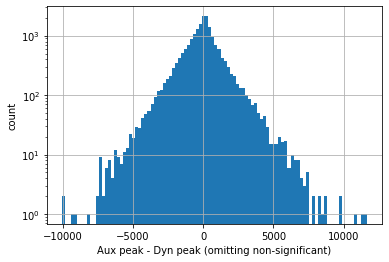

In [26]:
plt.figure(facecolor='white')
plt.hist(df['Y-Z_sig'], bins=100)
plt.xlabel('Aux peak - Dyn peak (omitting non-significant)')
plt.yscale('log')
plt.ylabel('count')
plt.grid()

print(f'frac time aux peak is larger {np.sum(df["Y-Z"] > 0) / df.shape[0]:.2f}')
print(f'frac time aux peak sig is larger {np.sum(df["Y-Z_sig"] >= 0) / (df.shape[0] - df["Y-Z_sig"].isna().sum()):.2f}')